**PROJECT TEAM ID** :  PTID-CDS-DEC-24-2273

**PROJECT CODE**    :  PRCP-1001-RiceLeaf 

**PROJECT NAME**    :  Detecting the type of Rice Leaf Disease

## Business Case :

-  Rice is by far the most important food crop for people in low- and lower-middle-income countries. Although rich and poor people alike eat rice in low-income countries, the poorest people consume relatively little wheat and are therefore deeply affected by the cost and availability of rice.
-  Rice is the staple food for over 50% of the world's population, and its production is crucial for food security
- In many Asian countries, rice is the fundamental and generally irreplaceable staple, especially of the poor. For the extreme poor in Asia, who live on less than $1.25 a day, rice accounts for nearly half of their food expenditures and a fifth of total household expenditures, on average.
-  This group alone annually spends the equivalent of. $62 billion (purchasing power parity) on rice. 
- But diseases like Leaf Smut, Brown Spot, and Bacterial Leaf Blight cause up to 70% yield loss, leading to \$5+ billion in annual losses.
- Manual inspection is slow, error-prone, and not scalable, To mitigate this AI-powered solutions are essential for real-time, accurate disease detection.
- The global rice market is valued at \$320+ billion, and AI in agriculture is projected to grow from \$1.1B (2020) to \$4B (2026), highlighting massive business potential.
- Deep learning models (ResNet50, EfficientNet) can automate disease identification, optimize pesticide usage, and increase crop yield.
- AI-based solutions can be deployed via mobile apps, edge AI for offline detection, and IoT-enabled smart farming to support farmers globally.
- Business opportunities include SaaS subscriptions, AI-powered drones, and predictive analytics, driving sustainable, cost-effective precision agriculture.
- Investing in AI-driven rice disease detection ensures food security, maximizes farm productivity, and revolutionizes modern farming.
- So We're going to build the AI-driven rice disease detection model to ensure the mitigation of lose for fromeres by using the deployed model to devices for disease diagnosis.

## Domain Analysis :

### 1.  Leaf Smut (Fungal Disease) :
- Common in Southeast Asia and India, affecting millions of hectares annually,Leads to low market value of rice grains due to poor quality.
- Leaf Smut is caused by the fungus Entyloma oryzae or Ustilaginoidea virens which spreads through infected seeds, air, and high humidity environments.
- Symptoms looks like small black or dark brown spots appear on leaves and leaves become brittle and break easily and it's reduced photosynthesis leadin to weak plant growth.
- This affects photosynthesis efficiency, leading to stunted growth causing low-quality grain production.
- Due to this fungal disease, history records show that the Yield loss might occur about 10%-20% if not controlled early.   
**Prevention & Treatment :**
    - Use resistant rice varieties.
    - Apply fungicides (e.g., Propiconazole, Tebuconazole) early.
    - Improve field drainage to reduce humidity.
    - AI-powered early detection helps prevent outbreaks and can save farmers up to 15% in pesticide costs.
 
 ### 2. Brown Spot (Fungal Disease) :
 - Severe outbreaks contributed to the Bengal Famine (1942-43) because of Brown Spot and farmers lose up to 30% of profits due to infected grains being sold at lower prices.
- Brown Spot is caused by the fungus Cochliobolus miyabeanus (Bipolaris oryzae) which spreads through infected seeds, soil, and water splashes and triggered by nutrient deficiency (especially potassium).
- Symptoms are claerly observed with Brown, circular spots with yellow halos on leaves and affects both leaves and grains which reducing grain weight  and causes seedling blight in nurseries, leading to early plant death.
- This leads to poor seed germination and plant stunting and causes “Famine Disease” due to its link to historical rice shortages and can result in 50% yield loss in severe outbreaks.   
**Prevention & Treatment :**
    - Use disease-free seeds and crop rotation.
    - Apply balanced fertilizers (high in potassium & phosphorus).
    - Use fungicides like Mancozeb, Tricyclazole.
    - AI-powered drone-based monitoring helps in early detection which can reduce losses by 40% through early intervention.

### 3. Bacterial Leaf Blight (Bacterial Disease) :
- Billions lost annually in Asia due to bacterial blight.this infected rice is unfit for export, leading to trade losses.
- Bacterial Blight is caused by Xanthomonas oryzae (Bacteria) which spreads through infected seeds, rain, and insect carriers.High nitrogen fertilizers increase susceptibility.
- Symptoms of Bacterial Blight are clearly observed with Water-soaked lesions along leaf veins and leaves turn yellow, wilt, and dry out which rapidly spreads across entire fields within weeks.
- This is the most destructive rice disease globally which reduces grain production by 50% if untreated and leads to empty grains and poor-quality rice yield.    
**Prevention & Treatment :**
    - Plant resistant rice varieties (e.g., IRBB series).
    - Avoid overuse of nitrogen fertilizers.
    - Use copper-based bactericides (less effective for large-scale control).
    - AI-powered image-based disease detection can stop outbreaks before spreading and can help reduce losses by 50%.




In [1]:
import os
import zipfile
import shutil
from PIL import Image
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.applications import EfficientNetB0 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout ,GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import CategoricalCrossentropy
from tensorflow.keras.layers import BatchNormalization

import warnings 
warnings.filterwarnings('ignore')

In [2]:
import os
from pathlib import Path
print(os.getcwd())  # Prints the current working directory
print(os.path.abspath('Data'))

C:\Users\tinku\Downloads\DSDM_Projects\RiceLeaf
C:\Users\tinku\Downloads\DSDM_Projects\RiceLeaf\Data


In [3]:
# Getting the Paths 
Data_folder = os.path.abspath('Data')
Output_folder = os.getcwd()
train_split_size= 0.8
print(f'Data Path : {Data_folder} \n Output Path : {Output_folder}')

Data Path : C:\Users\tinku\Downloads\DSDM_Projects\RiceLeaf\Data 
 Output Path : C:\Users\tinku\Downloads\DSDM_Projects\RiceLeaf


In [4]:
# Creating Superate Directories for Train and Test
Train_dir = os.path.join(Output_folder,'Train')
Test_dir = os.path.join(Output_folder , 'Test')

os.makedirs(Train_dir, exist_ok=True)
os.makedirs(Test_dir, exist_ok=True)

In [5]:
for sub_dir in os.listdir(Data_folder):
    # Getting Path for Each Direcotory in the Data Folder
    sub_dir_path = os.path.join(Data_folder,sub_dir)

    # Check if the Sub Directory is a zip file
    if sub_dir.endswith('.zip'):
        # Extract an Organize Images
        with zipfile.ZipFile(sub_dir, 'r') as zip_ref :
            extract_path = os.path.join(Data_folder, sub_dir[:-4])
            zip_ref.extractall(extract_path)

        


In [6]:

# Organize images into classes
for sub_dir in os.listdir(Data_folder):
    class_name = os.path.basename(sub_dir)
    class_img = []
    full_sub_dir_path = os.path.join(Data_folder, sub_dir)

    if os.path.isdir(full_sub_dir_path):
        for root, dirs, files in os.walk(full_sub_dir_path):
            # Removing dodgy images
            for file in files:
                if file.lower().endswith(('.png', '.jpg', '.jpeg')):
                    class_img.append(os.path.join(root, file))

        # Shuffle and split images
        random.shuffle(class_img)
        split_index = int(len(class_img) * train_split_size)
        train_images = class_img[:split_index]
        test_images = class_img[split_index:]

        # Create class directories
        train_class_dir = os.path.join(Train_dir, class_name)
        test_class_dir = os.path.join(Test_dir, class_name)
        os.makedirs(train_class_dir, exist_ok=True)
        os.makedirs(test_class_dir, exist_ok=True)

        # Function to copy images if they don't already exist
        def copy_if_not_exists(src_path, dest_dir):
            dest_path = os.path.join(dest_dir, os.path.basename(src_path))
            if not os.path.exists(dest_path):
                shutil.copy2(src_path, dest_path)
                print(f"Copied {src_path} to {dest_path}")
            else:
                print(f"File {dest_path} already exists. Skipping copy.")

        # Moving images to train & test directories
        for img_path in train_images:
            copy_if_not_exists(img_path, train_class_dir)
        for img_path in test_images:
            copy_if_not_exists(img_path, test_class_dir)

print("Images have been successfully extracted, split, and organized into train and test folders.")


Copied C:\Users\tinku\Downloads\DSDM_Projects\RiceLeaf\Data\Bacterial leaf blight\DSC_0382.JPG to C:\Users\tinku\Downloads\DSDM_Projects\RiceLeaf\Train\Bacterial leaf blight\DSC_0382.JPG
Copied C:\Users\tinku\Downloads\DSDM_Projects\RiceLeaf\Data\Bacterial leaf blight\DSC_0367.JPG to C:\Users\tinku\Downloads\DSDM_Projects\RiceLeaf\Train\Bacterial leaf blight\DSC_0367.JPG
File C:\Users\tinku\Downloads\DSDM_Projects\RiceLeaf\Train\Bacterial leaf blight\DSC_0403.JPG already exists. Skipping copy.
Copied C:\Users\tinku\Downloads\DSDM_Projects\RiceLeaf\Data\Bacterial leaf blight\DSC_0397.JPG to C:\Users\tinku\Downloads\DSDM_Projects\RiceLeaf\Train\Bacterial leaf blight\DSC_0397.JPG
File C:\Users\tinku\Downloads\DSDM_Projects\RiceLeaf\Train\Bacterial leaf blight\DSC_0400.JPG already exists. Skipping copy.
File C:\Users\tinku\Downloads\DSDM_Projects\RiceLeaf\Train\Bacterial leaf blight\DSC_0372.JPG already exists. Skipping copy.
File C:\Users\tinku\Downloads\DSDM_Projects\RiceLeaf\Train\Bacte

In [7]:
# Define paths for Train and Test
Train_Directory = os.path.abspath('Train')
Test_Directory = os.path.abspath("Test")

# Verify Paths 
print(f" Train Directory Exist : {os.path.exists(Train_dir)}")
print(f" Test Directory Exist : {os.path.exists(Test_dir)} \n \n{'**'*35} \n ")

# print Directory Structure
print('Train Directory Structure')
for root, dirs, files in os.walk(Train_dir):
    print(f'{os.path.basename(root)} Root : {root}\nDirectory : {dirs}\nFiles : {files} \n{'---'*35}')

print(f'\n Test Directory Structure\n \n {'**'*35}')
for root, dirs, files in os.walk(Test_dir):
    print(f'{os.path.basename(root)} Root : {root}\n,Directory : {dirs}\n,Files : {files}')




 Train Directory Exist : True
 Test Directory Exist : True 
 
********************************************************************** 
 
Train Directory Structure
Train Root : C:\Users\tinku\Downloads\DSDM_Projects\RiceLeaf\Train
Directory : ['Bacterial leaf blight', 'Brown spot', 'Leaf smut']
Files : [] 
---------------------------------------------------------------------------------------------------------
Bacterial leaf blight Root : C:\Users\tinku\Downloads\DSDM_Projects\RiceLeaf\Train\Bacterial leaf blight
Directory : []
Files : ['DSC_0365.JPG', 'DSC_0366.jpg', 'DSC_0367.JPG', 'DSC_0370.jpg', 'DSC_0372.JPG', 'DSC_0373.JPG', 'DSC_0374.JPG', 'DSC_0375.JPG', 'DSC_0376.JPG', 'DSC_0377.JPG', 'DSC_0378.JPG', 'DSC_0379.JPG', 'DSC_0380.JPG', 'DSC_0381.JPG', 'DSC_0382.JPG', 'DSC_0383.JPG', 'DSC_0384.JPG', 'DSC_0386.JPG', 'DSC_0388.JPG', 'DSC_0389.JPG', 'DSC_0392.JPG', 'DSC_0393.JPG', 'DSC_0395.JPG', 'DSC_0396.JPG', 'DSC_0397.JPG', 'DSC_0398.JPG', 'DSC_0399.JPG', 'DSC_0400.JPG', 'DSC_0401.J

In [8]:
# Clean up unnecessary folders
for folder in os.listdir(Data_folder):
    folder_path = os.path.join(Data_folder, folder)
    if folder not in ['Brown spot', 'Leaf smut', 'Bacterial leaf blight']:
        print(f"Removing folder: {folder}")
        shutil.rmtree(folder_path)  # Remove the folder

Found 115 files belonging to 3 classes.


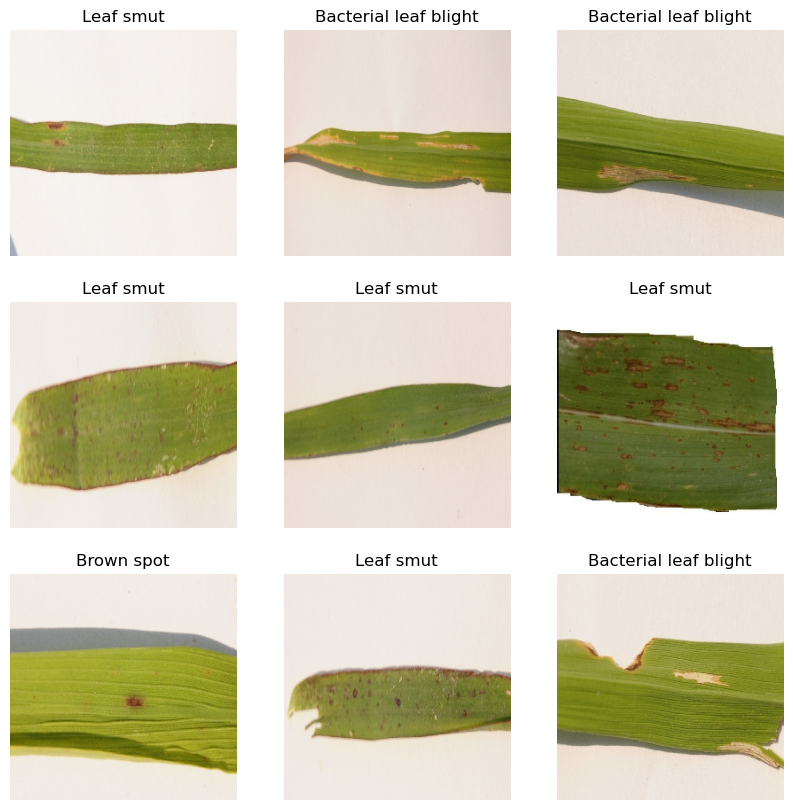

In [9]:


# Load the dataset
dataset = tf.keras.utils.image_dataset_from_directory(
    Train_Directory,
    labels='inferred',  # Automatically infers labels from subdirectory names
    label_mode='int',   # Labels are returned as integers
    image_size=(256, 256),  # Resize images to 256x256
    batch_size=32,      # Number of images to return in each batch
    shuffle=True        # Shuffle the data
)

# Retrieve a batch of images and labels
for images, labels in dataset.take(1):
    # Display the first 9 images and their labels
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(dataset.class_names[labels[i]])
        plt.axis("off")
    plt.show()


#### Data Augumentation

In [113]:
# Image dimensions and batch size  
image_size = (224, 224)
batch_size = 32

In [115]:
# Define augmentation strategies
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,  # Normalize pixel values
    rotation_range=20,  # Rotate images randomly by up to 20 degrees
    width_shift_range=0.1,  # Random horizontal shift
    height_shift_range=0.1,  # Random vertical shift
    shear_range=0.2,  # Shearing transformations
    zoom_range=0.2,  # Random zoom
    horizontal_flip=True,  # Flip images horizontally  
    # validation_split= 0.2 , # 20% data for validation
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0 ,
    rotation_range=5,  # Slight rotation
    zoom_range=0.05
)

# Load Train Data
train_generator = train_datagen.flow_from_directory(
    Train_Directory,
    target_size=image_size,     
    batch_size=batch_size,
    class_mode='categorical'         
)


validation_generator = val_datagen.flow_from_directory(
    Test_Directory,
    target_size= image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

# Check the results
print(f"Found {train_generator.samples} training images belonging to {len(train_generator.class_indices)} classes.")
print(f"Found {validation_generator.samples} testing images belonging to {len(validation_generator.class_indices)} classes.")

Found 115 images belonging to 3 classes.
Found 44 images belonging to 3 classes.
Found 115 training images belonging to 3 classes.
Found 44 testing images belonging to 3 classes.


Found 115 files belonging to 3 classes.


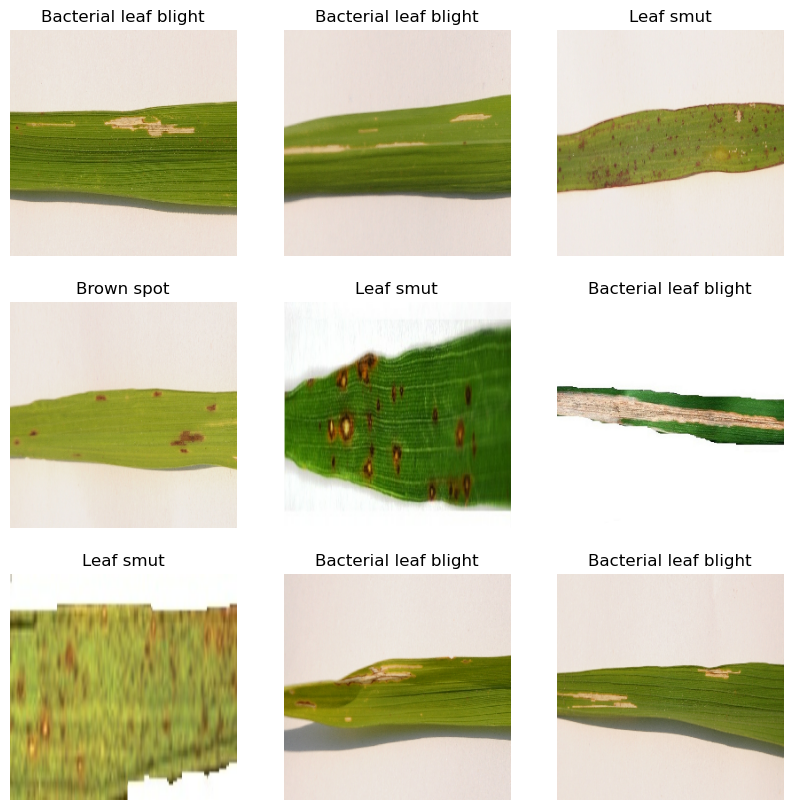

In [12]:

# Load the dataset
dataset = tf.keras.utils.image_dataset_from_directory(
    Train_Directory,
    labels='inferred',  # Automatically infers labels from subdirectory names
    label_mode='int',   # Labels are returned as integers
    image_size=(256, 256),  # Resize images to 256x256
    batch_size=32,      # Number of images to return in each batch
    shuffle=True        # Shuffle the data
)

# Retrieve a batch of images and labels
for images, labels in dataset.take(1):
    # Display the first 9 images and their labels
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(dataset.class_names[labels[i]])
        plt.axis("off")
    plt.show()


#### CNN Model :

In [13]:
# Build the CNN model
CNN_model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.3),  # 30% dropout
    Dense(3, activation='softmax')  # Use 'softmax' for multi-class classification
])

In [14]:
# Compile the model
CNN_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',  # Use 'categorical_crossentropy' for multi-class classification
    metrics=['accuracy']
)


In [15]:
# Print the model summary
CNN_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │      44,302,848 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │           1,539 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 44,397,635 (169.36 MB)

 Trainable params: 44,397,635 (169.36 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
# Train the model 
epochs = 100  # Adjust the number of epochs
CNN_history = CNN_model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.4189 - loss: 7.4689 - val_accuracy: 0.3125 - val_loss: 4.1731
Epoch 2/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 630ms/step - accuracy: 0.2500 - loss: 4.3141 - val_accuracy: 0.3438 - val_loss: 1.4923
Epoch 3/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.3791 - loss: 1.2659 - val_accuracy: 0.2812 - val_loss: 1.1337
Epoch 4/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 623ms/step - accuracy: 0.3438 - loss: 1.1347 - val_accuracy: 0.3438 - val_loss: 1.0694
Epoch 5/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 3s/step - accuracy: 0.3815 - loss: 1.0634 - val_accuracy: 0.3750 - val_loss: 1.0031
Epoch 6/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 756ms/step - accuracy: 0.3158 - loss: 1.0344 - val_accuracy: 0.3750 - val_loss: 1.0611
Epoch 7/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.3625 - loss: 1.0648 - val_accuracy: 0.5000 - val_loss: 0.9320
Epoch 8/100
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 659ms/step - accuracy: 0.5312 - loss: 0.9760 - val_accuracy: 0.4688 - val_loss: 0.

In [17]:
# Evaluate the model on the test set
CNN_test_loss, CNN_test_accuracy = CNN_model.evaluate(validation_generator)
print(f"Test Loss: {CNN_test_loss}")
print(f"Test Accuracy: {CNN_test_accuracy}")

# Save the trained model
CNN_model.save('cnn_model.h5')
print("Model saved as 'cnn_model.h5'")

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 447ms/step - accuracy: 0.9697 - loss: 0.1972


Test Loss: 0.22321926057338715
Test Accuracy: 0.9545454382896423
Model saved as 'cnn_model.h5'


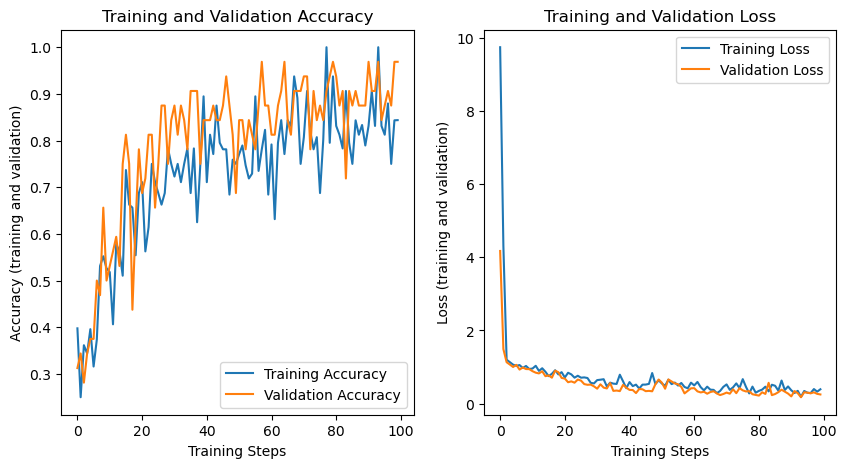

In [18]:
CNN_acc = CNN_history.history['accuracy']
CNN_val_acc = CNN_history.history['val_accuracy']

CNN_loss = CNN_history.history['loss']
CNN_val_loss = CNN_history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, CNN_acc, label='Training Accuracy')  
plt.plot(epochs_range, CNN_val_acc, label='Validation Accuracy')  
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, CNN_loss, label='Training Loss')
plt.plot(epochs_range, CNN_val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.show()

#### VGG19 Pre-Trained Models

In [56]:
from tensorflow.keras.applications import VGG19

VGG19_base_model = VGG19(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in VGG19_base_model.layers:
    layer.trainable = False

# Assuming base_model is already defined and is a Keras model
x = VGG19_base_model.output
x= Flatten()(x)
x= Dense(256 ,activation ='relu')(x)
x= Dropout(0.5)(x)
VGG_output=Dense(train_generator.num_classes,activation ='softmax')(x)


# Corrected Model constructor
VGG19_model = Model(inputs=VGG19_base_model.input , outputs=VGG_output)

# Define the complete model Using Funtional API Transfor learning 
VGG19_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
 
# Train the model
VGG19_model_history = VGG19_model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator
)


Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 31s 5s/step - accuracy: 0.3899 - loss: 4.1583 - val_accuracy: 0.3636 - val_loss: 6.7582
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step - accuracy: 0.3290 - loss: 5.9723 - val_accuracy: 0.4773 - val_loss: 2.4224
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step - accuracy: 0.5508 - loss: 2.5086 - val_accuracy: 0.5682 - val_loss: 1.5195
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 5s/step - accuracy: 0.5035 - loss: 2.1701 - val_accuracy: 0.6818 - val_loss: 1.2077
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step - accuracy: 0.5042 - loss: 2.4531 - val_accuracy: 0.7727 - val_loss: 0.5013
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 5s/step - accuracy: 0.6145 - loss: 1.4422 - val_accuracy: 0.6818 - val_loss: 0.7707
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.5702 - loss: 1.3745 - val_accuracy: 0.7273 - val_loss: 0.7124
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 5s/step - accuracy: 0.5723 - loss: 1.0610 - val_accuracy: 0.8182 - val_loss: 0.4236
Epoch 9/

In [57]:
# Evaluate the model on the test set
VGG19_test_loss, VGG19_test_accuracy = VGG19_model.evaluate(validation_generator)
print(f"Test Loss: {VGG19_test_loss}")
print(f"Test Accuracy: {VGG19_test_accuracy}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 1.0000 - loss: 0.1396
Test Loss: 0.13737569749355316
Test Accuracy: 1.0


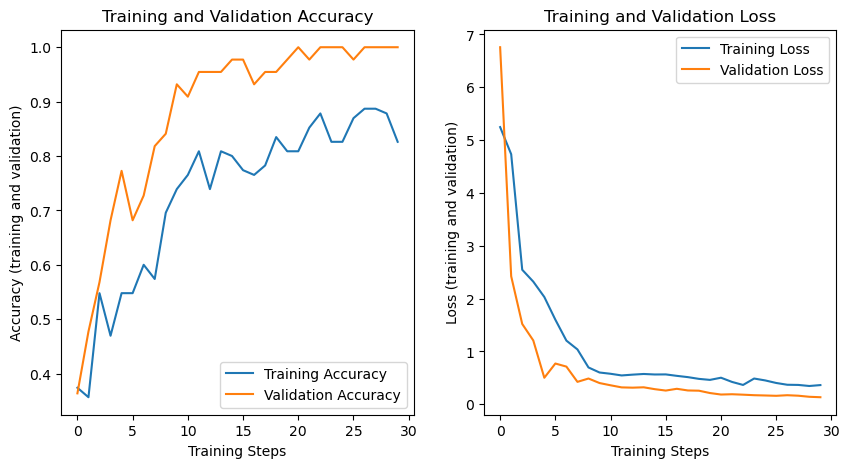

In [58]:
VGG19_acc = VGG19_model_history.history['accuracy']
VGG19_val_acc = VGG19_model_history.history['val_accuracy']

VGG19_loss = VGG19_model_history.history['loss']
VGG19_val_loss = VGG19_model_history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, VGG19_acc, label='Training Accuracy')  
plt.plot(epochs_range, VGG19_val_acc, label='Validation Accuracy')  
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, VGG19_loss, label='Training Loss')
plt.plot(epochs_range, VGG19_val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.show()

#### Fine Tuning VGG19 Model

In [47]:

# Unfreeze last 5 layers for fine-tuning
for layer in VGG19_base_model.layers[:-5]:  
    layer.trainable = False  # Keep earlier layers frozen
for layer in VGG19_base_model.layers[-5:]:
    layer.trainable = True   # Unfreeze last 5 layers

# Recompile with a lower learning rate
VGG19_model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune deeper layers
VGG19_model.fit(train_generator, epochs=35, validation_data=validation_generator)


Epoch 1/35
4/4 ━━━━━━━━━━━━━━━━━━━━ 28s 6s/step - accuracy: 0.9965 - loss: 0.0395 - val_accuracy: 1.0000 - val_loss: 0.0120
Epoch 2/35
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step - accuracy: 0.9675 - loss: 0.0692 - val_accuracy: 0.9773 - val_loss: 0.0644
Epoch 3/35
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.9930 - loss: 0.0426 - val_accuracy: 0.9773 - val_loss: 0.0841
Epoch 4/35
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step - accuracy: 0.9769 - loss: 0.0780 - val_accuracy: 0.9773 - val_loss: 0.1050
Epoch 5/35
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 5s/step - accuracy: 0.9944 - loss: 0.0509 - val_accuracy: 0.9773 - val_loss: 0.0388
Epoch 6/35
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 5s/step - accuracy: 0.9878 - loss: 0.0402 - val_accuracy: 1.0000 - val_loss: 0.0135
Epoch 7/35
4/4 ━━━━━━━━━━━━━━━━━━━━ 23s 6s/step - accuracy: 0.9570 - loss: 0.1025 - val_accuracy: 0.9773 - val_loss: 0.0227
Epoch 8/35
4/4 ━━━━━━━━━━━━━━━━━━━━ 22s 5s/step - accuracy: 0.9941 - loss: 0.0399 - val_accuracy: 0.9773 - val_loss: 0.0261
Epoch 9/

In [48]:
# Evaluate the model on the test set
VGG19_test_loss, VGG19_test_accuracy = VGG19_model.evaluate(validation_generator)
print(f"Test Loss: {VGG19_test_loss}")
print(f"Test Accuracy: {VGG19_test_accuracy}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.9744 - loss: 0.0805
Test Loss: 0.07171819359064102
Test Accuracy: 0.9772727489471436


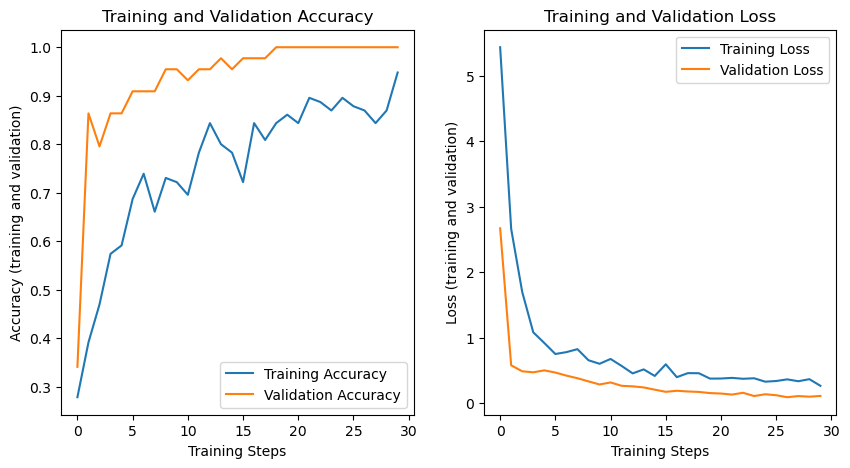

In [49]:
VGG19_acc = VGG19_model_history.history['accuracy']
VGG19_val_acc = VGG19_model_history.history['val_accuracy']

VGG19_loss = VGG19_model_history.history['loss']
VGG19_val_loss = VGG19_model_history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, VGG19_acc, label='Training Accuracy')  
plt.plot(epochs_range, VGG19_val_acc, label='Validation Accuracy')  
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, VGG19_loss, label='Training Loss')
plt.plot(epochs_range, VGG19_val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.show()

#### MobileNet Pre-Trained Models

In [62]:
# from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2
from keras.models import Model


MobileNet_base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model
MobileNet_base_model.trainable = False

# Add custom classification layers
x = MobileNet_base_model.output
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)

# Define the complete model Using Funtional API Transfor learning
MobileNet_model = Model(inputs=MobileNet_base_model.input, outputs=predictions)

# Compile the model
MobileNet_model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
MobileNet_history = MobileNet_model.fit(
    train_generator,
    epochs=30,
    validation_data=validation_generator
)


Epoch 1/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 17s 3s/step - accuracy: 0.3970 - loss: 22.0118 - val_accuracy: 0.5455 - val_loss: 10.3810
Epoch 2/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.4031 - loss: 11.9004 - val_accuracy: 0.8182 - val_loss: 3.5072
Epoch 3/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.7701 - loss: 2.5607 - val_accuracy: 0.7273 - val_loss: 6.1301
Epoch 4/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.7673 - loss: 5.7430 - val_accuracy: 0.8636 - val_loss: 2.2797
Epoch 5/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.8657 - loss: 2.3322 - val_accuracy: 0.8864 - val_loss: 0.7867
Epoch 6/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.8653 - loss: 1.4196 - val_accuracy: 0.9091 - val_loss: 0.7652
Epoch 7/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.9308 - loss: 0.4883 - val_accuracy: 1.0000 - val_loss: 0.0020
Epoch 8/30
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.9566 - loss: 0.2304 - val_accuracy: 0.9318 - val_loss: 0.3167
Epoch 9/30
4

In [63]:
# Evaluate the model on the test set
MobileNet_test_loss, MobileNet_test_accuracy = MobileNet_model.evaluate(validation_generator)
print(f"Test Loss: {MobileNet_test_loss}")
print(f"Test Accuracy: {MobileNet_test_accuracy}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 345ms/step - accuracy: 1.0000 - loss: 0.0107
Test Loss: 0.015783142298460007
Test Accuracy: 1.0


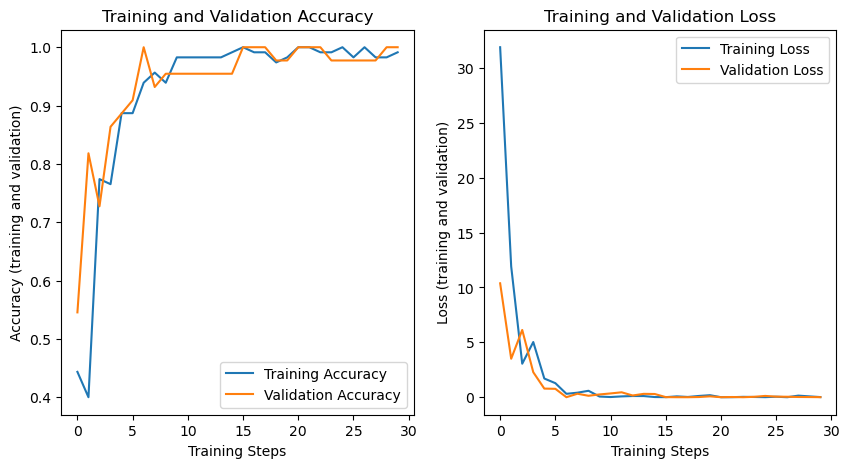

In [64]:
MobileNet_acc = MobileNet_history.history['accuracy']
MobileNet_val_acc = MobileNet_history.history['val_accuracy']

MobileNet_loss = MobileNet_history.history['loss']
MobileNet_val_loss = MobileNet_history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, MobileNet_acc, label='Training Accuracy')  
plt.plot(epochs_range, MobileNet_val_acc, label='Validation Accuracy')  
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, MobileNet_loss, label='Training Loss')
plt.plot(epochs_range, MobileNet_val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.show()

##### Fine Tuning for MobileNet :

In [65]:

# Unfreeze last 5 layers for fine-tuning
for layer in MobileNet_base_model.layers[:-5]:  
    layer.trainable = False  # Keep earlier layers frozen
for layer in MobileNet_base_model.layers[-5:]:
    layer.trainable = True   # Unfreeze last 5 layers

# Recompile with a lower learning rate
MobileNet_model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune deeper layers
MobileNet_history_fine =MobileNet_model.fit(
    train_generator,
    epochs=55,
    validation_data=validation_generator
)


Epoch 1/55
4/4 ━━━━━━━━━━━━━━━━━━━━ 19s 3s/step - accuracy: 1.0000 - loss: 0.0022 - val_accuracy: 1.0000 - val_loss: 0.0033
Epoch 2/55
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.9941 - loss: 0.0273 - val_accuracy: 0.9773 - val_loss: 0.1003
Epoch 3/55
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 1.0000 - loss: 8.3249e-04 - val_accuracy: 0.9773 - val_loss: 0.0285
Epoch 4/55
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.9878 - loss: 0.0255 - val_accuracy: 0.9773 - val_loss: 0.1046
Epoch 5/55
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.9773 - val_loss: 0.0952
Epoch 6/55
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.9679 - loss: 0.2297 - val_accuracy: 0.9773 - val_loss: 0.1116
Epoch 7/55
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.9839 - loss: 0.1081 - val_accuracy: 0.9773 - val_loss: 0.0204
Epoch 8/55
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 1.0000 - loss: 0.0021 - val_accuracy: 0.9773 - val_loss: 0.0404
Epoch 9/55


In [66]:
# Evaluate the model on the test set
MobileNet_fine_test_loss, MobileNet_fine_test_accuracy = MobileNet_model.evaluate(validation_generator)
print(f"Test Loss: {MobileNet_fine_test_loss}")
print(f"Test Accuracy: {MobileNet_fine_test_accuracy}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 375ms/step - accuracy: 1.0000 - loss: 0.0049
Test Loss: 0.004369093105196953
Test Accuracy: 1.0


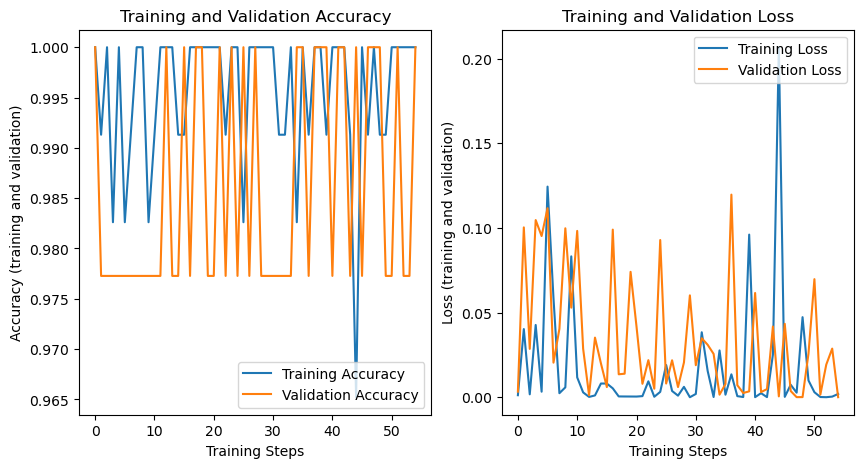

In [67]:
MobileNet_fine_acc = MobileNet_history_fine.history['accuracy']
MobileNet_fine_val_acc = MobileNet_history_fine.history['val_accuracy']

MobileNet_fine_loss = MobileNet_history_fine.history['loss']
MobileNet_fine_val_loss = MobileNet_history_fine.history['val_loss']

epochs_range = range(55)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, MobileNet_fine_acc, label='Training Accuracy')  
plt.plot(epochs_range, MobileNet_fine_val_acc, label='Validation Accuracy')  
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, MobileNet_fine_loss, label='Training Loss')
plt.plot(epochs_range, MobileNet_fine_val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.show()

#### EfficientNetB0 Pre-Trained Models :

In [124]:

# Load EfficientNetB0 without top layers
EfficientNetB0_base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the base model to retain pretrained weights
EfficientNetB0_base_model.trainable = False  

# Add custom classification layers
x=EfficientNetB0_base_model.output
x = GlobalAveragePooling2D ()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.2)(x)

output_layer = Dense(train_generator.num_classes, activation='softmax')(x)  # Output layer for multi-class classification

# Create the final model
EfficientNetB0_model = Model(inputs=EfficientNetB0_base_model.input, outputs=output_layer)

# Compile the model
EfficientNetB0_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy']
              )


In [125]:

# Train the model
EfficientNetB0__history = EfficientNetB0_model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator
)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 30s 4s/step - accuracy: 0.2209 - loss: 1.3257 - val_accuracy: 0.3182 - val_loss: 1.1461
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.3155 - loss: 1.1750 - val_accuracy: 0.3182 - val_loss: 1.1066
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.3325 - loss: 1.1209 - val_accuracy: 0.3636 - val_loss: 1.1065
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.3773 - loss: 1.1281 - val_accuracy: 0.3182 - val_loss: 1.1035
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.3594 - loss: 1.1371 - val_accuracy: 0.3182 - val_loss: 1.0993
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.3874 - loss: 1.1197 - val_accuracy: 0.3636 - val_loss: 1.1021
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.3396 - loss: 1.1159 - val_accuracy: 0.3636 - val_loss: 1.1022
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.2948 - loss: 1.1349 - val_accuracy: 0.3636 - val_loss: 1.0973
Epoch 9

In [126]:
# EfficientNetB0_model.summary()

In [127]:
# Evaluate the model on the test set
EfficientNetB0_test_loss, EfficientNetB0_test_accuracy = EfficientNetB0_model.evaluate(validation_generator)
print(f"Test Loss: {EfficientNetB0_test_loss}")
print(f"Test Accuracy: {EfficientNetB0_test_accuracy}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 447ms/step - accuracy: 0.3674 - loss: 1.0979
Test Loss: 1.0978485345840454
Test Accuracy: 0.3636363744735718


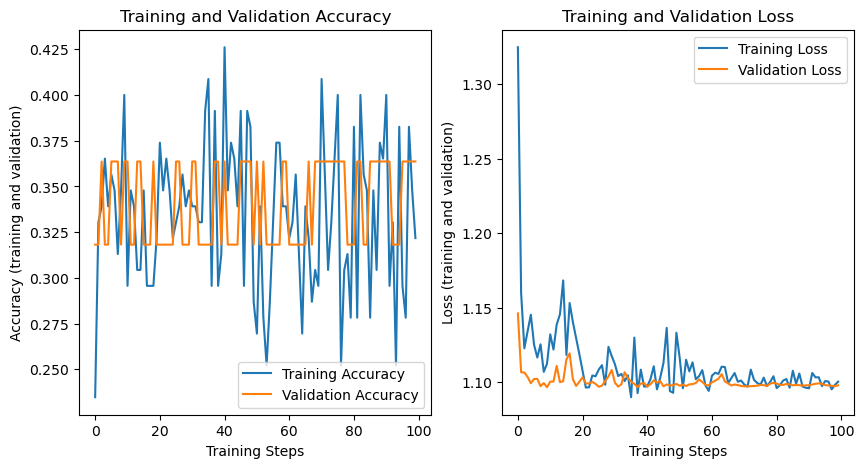

In [128]:
EfficientNetB0_acc = EfficientNetB0__history.history['accuracy']
EfficientNetB0_val_acc = EfficientNetB0__history.history['val_accuracy']

EfficientNetB0_loss = EfficientNetB0__history.history['loss']
EfficientNetB0_val_loss = EfficientNetB0__history.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, EfficientNetB0_acc, label='Training Accuracy')  
plt.plot(epochs_range, EfficientNetB0_val_acc, label='Validation Accuracy')  
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, EfficientNetB0_loss, label='Training Loss')
plt.plot(epochs_range, EfficientNetB0_val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.show()

#### Fine Tuning for EfficientNet

In [129]:

# Unfreeze last 5 layers for fine-tuning
for layer in EfficientNetB0_base_model.layers[:-5]:  
    layer.trainable = False  # Keep earlier layers frozen
for layer in EfficientNetB0_base_model.layers[-5:]:
    layer.trainable = True   # Unfreeze last 5 layers

# Recompile with a lower learning rate
EfficientNetB0_model.compile(optimizer=Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune deeper layers
EfficientNetB0_history_fine =EfficientNetB0_model.fit(
    train_generator,
    epochs=100,
    validation_data=validation_generator
)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 27s 3s/step - accuracy: 0.3132 - loss: 1.2832 - val_accuracy: 0.3636 - val_loss: 1.0979
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.3211 - loss: 1.2460 - val_accuracy: 0.3636 - val_loss: 1.0979
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.3878 - loss: 1.1822 - val_accuracy: 0.3636 - val_loss: 1.0980
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.2682 - loss: 1.2687 - val_accuracy: 0.3636 - val_loss: 1.0980
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.2697 - loss: 1.2848 - val_accuracy: 0.3636 - val_loss: 1.0980
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.3874 - loss: 1.1858 - val_accuracy: 0.3636 - val_loss: 1.0980
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.3944 - loss: 1.1554 - val_accuracy: 0.3636 - val_loss: 1.0981
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 7s 2s/step - accuracy: 0.3585 - loss: 1.1186 - val_accuracy: 0.3636 - val_loss: 1.0981
Epoch 9

In [130]:
# Evaluate the model on the test set
EfficientNetB0_fine_test_loss, EfficientNetB0_fine_test_accuracy = EfficientNetB0_model.evaluate(validation_generator)
print(f"Test Loss: {EfficientNetB0_fine_test_loss}")
print(f"Test Accuracy: {EfficientNetB0_fine_test_accuracy}")


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 462ms/step - accuracy: 0.3570 - loss: 1.0978
Test Loss: 1.0979310274124146
Test Accuracy: 0.3636363744735718


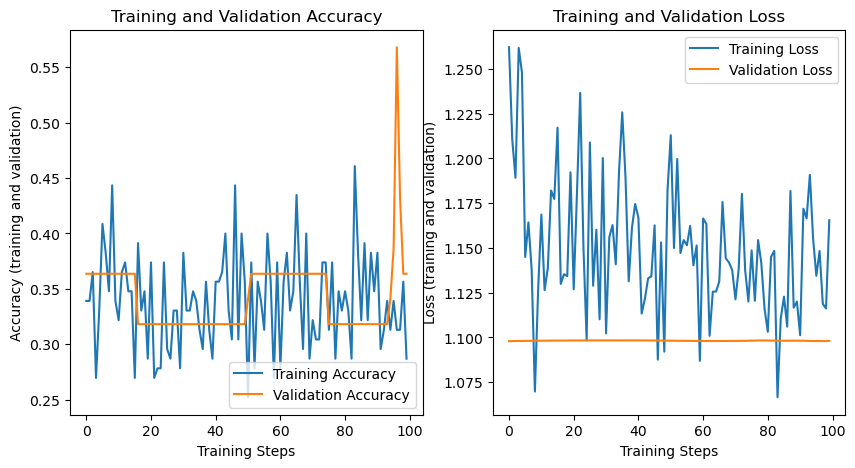

In [131]:
EfficientNetB0_fine_acc = EfficientNetB0_history_fine.history['accuracy']
EfficientNetB0_fine_val_acc = EfficientNetB0_history_fine.history['val_accuracy']

EfficientNetB0_fine_loss = EfficientNetB0_history_fine.history['loss']
EfficientNetB0_fine_val_loss = EfficientNetB0_history_fine.history['val_loss']

epochs_range = range(100)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, EfficientNetB0_fine_acc, label='Training Accuracy')  
plt.plot(epochs_range, EfficientNetB0_fine_val_acc, label='Validation Accuracy')  
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.ylabel("Accuracy (training and validation)")
plt.xlabel("Training Steps")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, EfficientNetB0_fine_loss, label='Training Loss')
plt.plot(epochs_range, EfficientNetB0_fine_val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.ylabel("Loss (training and validation)")
plt.xlabel("Training Steps")
plt.show()

### Testing 

## Challenges

### **Challenges Faced in the Project**  

1. **File Handling Complexity :**  
   Managing image files, loading them correctly into the training pipeline, and ensuring proper labeling was tricky. File paths, directory structures, and handling different formats required careful preprocessing.  

2. **Fluctuating Model Accuracy Across Runs :**  
   The accuracy varied significantly each time the model was trained, regardless of whether it was a basic CNN or a pre-trained model. This inconsistency was primarily due to the small dataset, randomness in weight initialization, and augmentation variations.  

3. **Initial Overfitting in Every Model :**  
   Every model, including CNN and pre-trained architectures, initially showed signs of overfitting. This was evident through a large gap between training and validation accuracy, indicating the model memorized the training data instead of learning general patterns.  

4. **Time-Intensive Data Augmentation for Overfitting Reduction :**  
   Finding the right augmentation techniques and parameters was time-consuming. While augmentation helped mitigate overfitting, excessive transformations sometimes distorted key features, negatively impacting model learning.  

5. **Overfitting Despite Preventive Techniques :**  
   Various methods were attempted to counter overfitting, including dropout layers, normalization, and weight regularization. However, normalization in particular led to even more overfitting due to the limited dataset size, as the model struggled to identify meaningful patterns.  

6. **Small Dataset Challenge :**  
   With only around 40 images per class, the model lacked sufficient data to learn robust patterns. This led to high variance and sensitivity to slight dataset changes, affecting generalization. Transfer learning helped, but fine-tuning required careful adjustments.  

7. **Class Imbalance Concerns :**  
   The dataset had slightly different numbers of images per class, which could cause the model to be biased towards the majority class. Techniques like class weighting or oversampling were considered but had limited effectiveness due to the overall dataset size.  

8. **Tuning Learning Rate and Batch Size :**  
   Finding the optimal learning rate and batch size was challenging, as a too-high learning rate led to instability, while a too-low rate resulted in slow convergence. Smaller batch sizes sometimes improved generalization but also increased noise in weight updates.  

9. **Computational Resource Constraints :**  
   Training deep learning models, especially fine-tuning pre-trained architectures, was computationally expensive. Training on CPU was slow, while using GPUs required additional configurations and memory management.  

10. **EfficientNetB0 Instability :**  
   EfficientNetB0 struggled with high fluctuations in loss and accuracy, making it unsuitable without further adjustments. Its sensitivity to hyperparameters and dataset size made it hard to stabilize compared to MobileNet or VGG19.  


### **Overall Challenge Summary:**  
Dealing with a small dataset, overfitting, accuracy fluctuations, and computational limitations were the major hurdles. While data augmentation and dropout helped, fine-tuning pre-trained models required careful adjustments. MobileNet emerged as the best option for deployment due to its stability, while deeper networks like EfficientNetB0 were harder to optimize for this dataset.

## Conclussion

#### CNN :
- **Test Loss: 0.2232** ,
- **Test Accuracy: 95.45%**

A basic CNN achieved good accuracy; however, the noticeable gap between training and validation metrics suggests potential overfitting risks that should be monitored.

#### VGG19 :
- **Test Loss: 0.1374** ,
- **Test Accuracy: 100%**

VGG19 delivered perfect test accuracy, but the significant discrepancy between training and validation losses indicates overfitting, warranting cautious interpretation of the results.

#### VGG19 Fine-Tune:
- **Test Loss: 0.0717** ,
- **Test Accuracy: 97.73%**
 
Fine-tuning VGG19 slightly reduced overfitting, yet the gap in metrics across training and validation sets implies that further regularization or augmentation might be beneficial.

#### MobileNet:
- **Test Loss: 0.0158** ,
- **Test Accuracy: 100%**

MobileNet performed exceptionally with high accuracy and stable loss curves, showing no evident overfitting, making it a robust candidate for production.

#### MobileNet Fine-Tune:
- **Test Loss: 0.0044** ,
- **Test Accuracy: 100%**

While fine-tuning improved loss, the presence of spiky overfitting patterns in the training graphs suggests that aggressive fine-tuning may lead to instability despite perfect test accuracy.

#### EfficientNetB0:
- **Test Loss: 1.0978** ,
- **Test Accuracy: 36.36%**

EfficientNetB0 exhibited highly fluctuating accuracy with consistently poor test performance, making it unsuitable without significant adjustments.

#### EfficientNetB0 Fine-Tune:
- **Test Loss: 1.0979** ,
- **Test Accuracy:  36.36%**

Fine-tuning did not improve EfficientNetB0’s performance, as the model continued to show erratic training dynamics and low accuracy, signaling a need for reconsideration of its configuration.

## Result

**As our dataset is small (40 images for Bacterial Leaf Blight and Brown Spot, 39 images for Leaf Smut), MobileNet is the best model for production deployment due to its high accuracy and stable performance without overfitting. VGG19, despite achieving high accuracy, shows signs of overfitting and requires further regularization. Basic CNN and hyperparameter tuning using Keras Tuner are unnecessary, as more complex pre-trained models already provide superior performance.**